In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("population_data.csv", sep=";")
df

,Area,Total,0-4y,5-9y,10-14y,15-19y,20-24y,25-29y,30-34y,35-39y,...,45-49y,50-54y,55-59y,60-64y,65-69y,70-74y,75-79y,80-84y,85-89y,90-y
0,WHOLE_COUNTRY,4811067,203360,254362,268927,258690,264062,294990,285223,297319,...,270462,304130,330105,325590,326771,328704,214693,148621,90727,52025
1,Akaa,15968,624,959,1075,974,499,608,786,997,...,1055,1149,1068,1110,1161,1142,682,463,299,182
2,Alajärvi,9119,418,548,636,574,324,324,344,390,...,431,528,678,792,763,723,447,348,219,155
3,Alavieska,2492,120,184,182,167,105,101,118,137,...,124,144,177,192,175,151,99,100,65,34
4,Alavus,11137,535,618,702,660,426,471,475,584,...,558,700,782,833,915,853,584,456,265,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,Ylivieska,15039,933,1152,1073,1009,749,881,1029,1051,...,708,703,816,949,934,856,540,386,258,146
306,Ylöjärvi,32360,1822,2446,2458,2098,1004,1457,1957,2265,...,2106,2171,2146,2033,1790,1784,1175,720,432,217
307,Ypäjä,2262,66,98,122,110,93,100,102,111,...,126,158,179,190,201,195,106,73,50,40
308,Ähtäri,5458,189,234,312,286,167,176,228,275,...,247,334,413,481,529,561,300,248,136,81


In [3]:
#from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances
X=df.iloc[1:310,1:] #first 50 cities
X=X.reset_index(drop=True)

Y=df.iloc[1:310,0]
Y=Y.reset_index(drop=True)
print(Y)

x_scaled = StandardScaler().fit_transform(X) #scale data
dissimilarities=euclidean_distances(x_scaled)

mds = MDS(dissimilarity='precomputed', random_state=0)
X_transform = mds.fit_transform(dissimilarities)
#embedding = MDS(n_components=2,metric="True")
#X_transform = embedding.fit_transform(x_scaled)

X_transform.shape
distances=euclidean_distances(X_transform)

mds_df = pd.DataFrame(
    data=X_transform, 
    columns=['PC1','PC2'])
mds_df['target'] = Y
print(mds_df)


0           Akaa
1       Alajärvi
2      Alavieska
3         Alavus
4       Asikkala
         ...    
304    Ylivieska
305     Ylöjärvi
306        Ypäjä
307       Ähtäri
308    Äänekoski
Name: Area, Length: 309, dtype: object
          PC1       PC2     target
0   -0.099636 -0.138253       Akaa
1    0.632730  0.010834   Alajärvi
2    1.491331 -0.162335  Alavieska
3    0.405971  0.044378     Alavus
4    0.803342  0.075790   Asikkala
..        ...       ...        ...
304  0.065836 -0.382509  Ylivieska
305 -1.850530 -0.862175   Ylöjärvi
306  1.527165 -0.123664      Ypäjä
307  1.108617 -0.008010     Ähtäri
308 -0.407088  0.092482  Äänekoski

[309 rows x 3 columns]


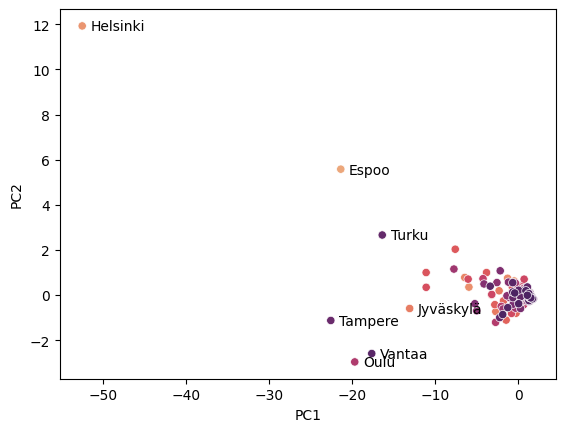

In [6]:
ax=sns.scatterplot(data=mds_df, x="PC1", y="PC2",hue="target", palette="flare", legend = False)
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Target")
main_cities=["Helsinki","Espoo","Tampere","Vantaa","Oulu","Turku","Jyväskylä"]
for i,city in enumerate(Y):
    #if (i+1)%50==0:
    if city in main_cities:
        ax.text(mds_df["PC1"].iloc[i]+1, mds_df["PC2"].iloc[i]-0.2,city, horizontalalignment='left', size='medium', color='black')

In [5]:
print(X.shape[0])

309


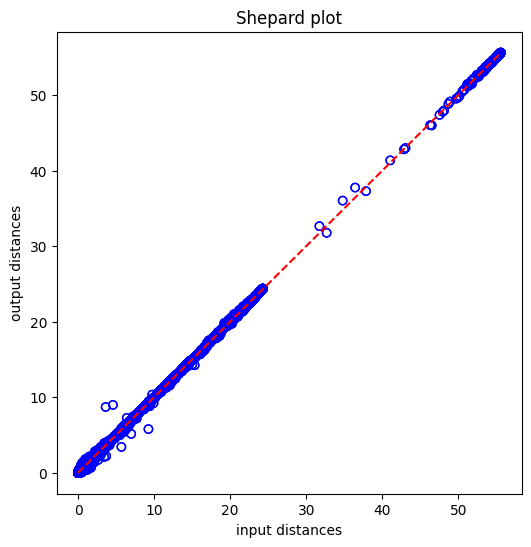

In [37]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(dissimilarities, distances, facecolors='none',edgecolors='blue')
ax.set_xlabel('input distances')
ax.set_ylabel('output distances')
ax.set_title('Shepard plot')

x_values=[np.min(dissimilarities),np.max(dissimilarities)]
y_values=[np.min(dissimilarities),np.max(dissimilarities)]
plt.plot(x_values, y_values, 'r', linestyle="--")

In [38]:
#from scipy.spatial.distance import pdist, squareform
 
from sklearn.metrics.pairwise import euclidean_distances
from sammon import sammon
X=df.iloc[1:310,1:] #first 50 cities
X=X.reset_index(drop=True)

Y=df.iloc[1:310,0]
Y=Y.reset_index(drop=True)
print(Y)

x_scaled = StandardScaler().fit_transform(X) #scale data

[x_transformed, E] = sammon(x_scaled, n=2)
x_transformed.shape

dissimilarities=euclidean_distances(x_scaled)
distances=euclidean_distances(x_transformed)

sammon_df = pd.DataFrame(
    data=x_transformed, 
    columns=['PC1','PC2'])
sammon_df['target'] = Y
print(sammon_df)
print(type(x_scaled))

0           Akaa
1       Alajärvi
2      Alavieska
3         Alavus
4       Asikkala
         ...    
304    Ylivieska
305     Ylöjärvi
306        Ypäjä
307       Ähtäri
308    Äänekoski
Name: Area, Length: 309, dtype: object
epoch = 1 : E = 0.0005614529
epoch = 2 : E = 0.0005473457
epoch = 3 : E = 0.0005244306
epoch = 4 : E = 0.0005159411
epoch = 5 : E = 0.0003244236
epoch = 6 : E = 0.0003210059
epoch = 7 : E = 0.0002111786
epoch = 8 : E = 0.0002070255
epoch = 9 : E = 0.0002025483
epoch = 10 : E = 0.0001981154
epoch = 11 : E = 0.0001978588
epoch = 12 : E = 0.0001977415
epoch = 13 : E = 0.0001945114
epoch = 14 : E = 0.0001945010
epoch = 15 : E = 0.0001932617
epoch = 16 : E = 0.0001930205
epoch = 17 : E = 0.0001924741
epoch = 18 : E = 0.0001922261
epoch = 19 : E = 0.0001920891
epoch = 20 : E = 0.0001920300
epoch = 21 : E = 0.0001919974
epoch = 22 : E = 0.0001918561
epoch = 23 : E = 0.0001918000
epoch = 24 : E = 0.0001917666
epoch = 25 : E = 0.0001917552
epoch = 26 : E = 0.0001916980
epo

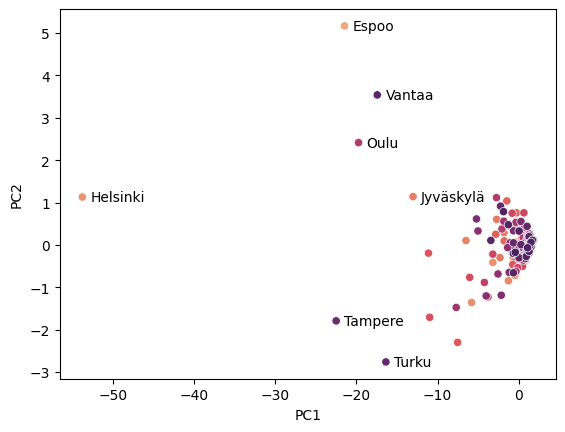

In [56]:
ax=sns.scatterplot(data=sammon_df, x="PC1", y="PC2",hue="target", palette="flare", legend = False)
main_cities=["Helsinki","Espoo","Tampere","Vantaa","Oulu","Turku","Jyväskylä"]
for i,city in enumerate(Y):
    #if (i+1)%50==0:
    if city in main_cities:
         ax.text(sammon_df["PC1"].iloc[i]+1, sammon_df["PC2"].iloc[i]-0.1,city, horizontalalignment='left', size='medium', color='black')

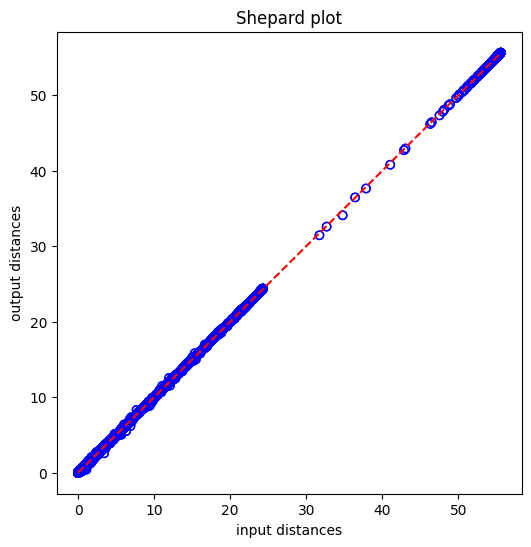

In [40]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(dissimilarities, distances, facecolors='none',edgecolors='blue')
ax.set_xlabel('input distances')
ax.set_ylabel('output distances')
ax.set_title('Shepard plot')

x_values=[np.min(dissimilarities),np.max(dissimilarities)]
y_values=[np.min(dissimilarities),np.max(dissimilarities)]
plt.plot(x_values, y_values, 'r', linestyle="--")